# Inspired by Stanford MS&E 226 – Fundamentals of Data Science

## Seminar 4, Prediction


**HSE University**<br/>
**Spring 2022**<br/>

---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Prediction

Given data **X** and **Y**, construct a fitted model ˆf so that given a
new covariate vector X~ from the population, the prediction error
between ˆf(X~ ) and the corresponding Y is minimized.

## The case of Classification

In [2]:
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

In [3]:
df_synt = pd.DataFrame({
    'x':X[0:,0],
    'y':X[0:,1],
    'real': y[0:]
})
df_synt.head()

,x,y,real
0,1.225160,-0.951731,1
1,1.016304,-1.725175,1
2,0.335340,-1.724896,1
3,1.786348,-1.782653,1
4,1.016751,1.062569,1


<AxesSubplot:xlabel='x', ylabel='y'>

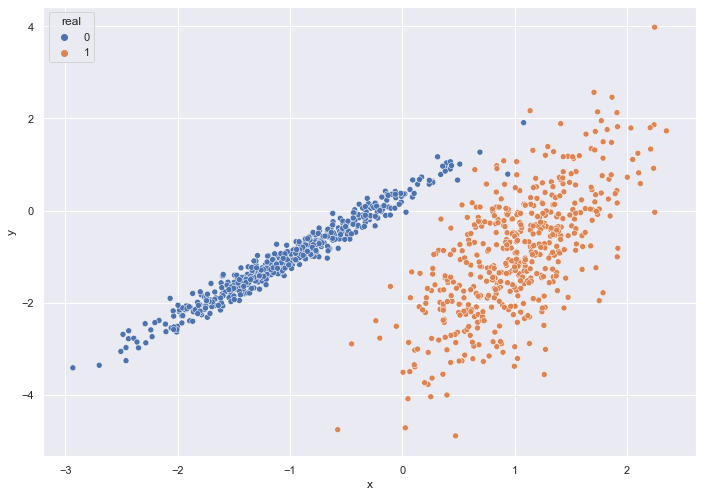

In [4]:
sns.scatterplot(data = df_synt, x = 'x', y = 'y', hue = 'real')

In [7]:
from sklearn.cluster import KMeans
data = df_synt.drop('real', axis = 1)

kmeans = KMeans(n_clusters=2, random_state=1).fit(data)
df_synt_predicted = df_synt.copy()
df_synt_predicted['kmean'] = kmeans.labels_

In [8]:
import hdbscan
hdbscaner = hdbscan.HDBSCAN(min_cluster_size=10)
cluster_labels = hdbscaner.fit_predict(data)
df_synt_predicted['hdbscan'] = cluster_labels

In [9]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, random_state=0, covariance_type = "full")
cluster_labels = gm.fit_predict(data)
df_synt_predicted['gmm'] = cluster_labels

In [10]:
df_synt_predicted.head()

,x,y,real,kmean,hdbscan,gmm
0,1.225160,-0.951731,1,0,1,0
1,1.016304,-1.725175,1,0,1,0
2,0.335340,-1.724896,1,1,1,0
3,1.786348,-1.782653,1,0,-1,0
4,1.016751,1.062569,1,0,-1,0


In [17]:
df_synt_predicted['kmean'] = (df_synt_predicted['kmean']-1)**2
df_synt_predicted['gmm'] = (df_synt_predicted['gmm']-1)**2
df_synt_predicted.head()

,x,y,real,kmean,hdbscan,gmm
0,1.225160,-0.951731,1,1,1,1
1,1.016304,-1.725175,1,1,1,1
2,0.335340,-1.724896,1,0,1,1
3,1.786348,-1.782653,1,1,-1,1
4,1.016751,1.062569,1,1,-1,1


In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df_synt_predicted['real'], df_synt_predicted['kmean'])
cm

array([[397, 104],
       [135, 364]], dtype=int64)

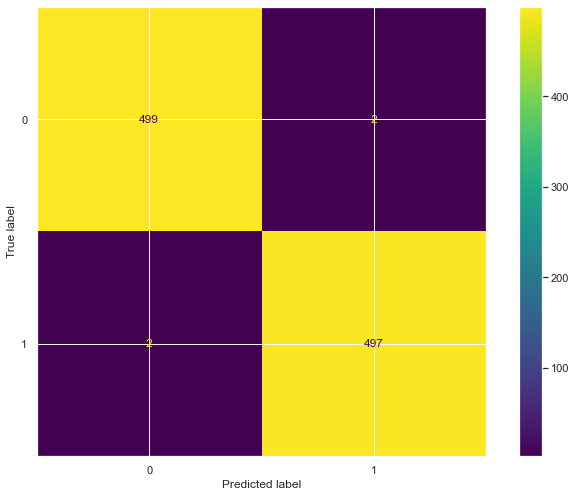

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(df_synt_predicted['real'], df_synt_predicted['gmm'])

In [34]:
help(accuracy_score)

Help on function accuracy_score in module sklearn.metrics._classification:

accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)
    Accuracy classification score.
    
    In multilabel classification, this function computes subset accuracy:
    the set of labels predicted for a sample must *exactly* match the
    corresponding set of labels in y_true.
    
    Read more in the :ref:`User Guide <accuracy_score>`.
    
    Parameters
    ----------
    y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) labels.
    
    y_pred : 1d array-like, or label indicator array / sparse matrix
        Predicted labels, as returned by a classifier.
    
    normalize : bool, default=True
        If ``False``, return the number of correctly classified samples.
        Otherwise, return the fraction of correctly classified samples.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    
    Ret

In [32]:
from sklearn.metrics import accuracy_score
for model in ['gmm', 'kmean', 'hdbscan']:
    print("Accuracy", model, ":")
    print(accuracy_score(df_synt_predicted['real'], df_synt_predicted[model]))

SyntaxError: invalid syntax (3646643732.py, line 5)

In [35]:
help(precision_score)

Help on function precision_score in module sklearn.metrics._classification:

precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
    Compute the precision.
    
    The precision is the ratio ``tp / (tp + fp)`` where ``tp`` is the number of
    true positives and ``fp`` the number of false positives. The precision is
    intuitively the ability of the classifier not to label as positive a sample
    that is negative.
    
    The best value is 1 and the worst value is 0.
    
    Read more in the :ref:`User Guide <precision_recall_f_measure_metrics>`.
    
    Parameters
    ----------
    y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) target values.
    
    y_pred : 1d array-like, or label indicator array / sparse matrix
        Estimated targets as returned by a classifier.
    
    labels : array-like, default=None
        The set of labels to include when ``average

In [31]:
from sklearn.metrics import precision_score
for model in ['gmm', 'kmean', 'hdbscan']:
    print("Precision", model, ":")
    print(precision_score(df_synt_predicted['real'], df_synt_predicted[model], average="weighted"))

Precision gmm :
0.996
Precision kmean :
0.7619776524644947
Precision hdbscan :
0.9967086402360279


In [36]:
help(recall_score)

Help on function recall_score in module sklearn.metrics._classification:

recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
    Compute the recall.
    
    The recall is the ratio ``tp / (tp + fn)`` where ``tp`` is the number of
    true positives and ``fn`` the number of false negatives. The recall is
    intuitively the ability of the classifier to find all the positive samples.
    
    The best value is 1 and the worst value is 0.
    
    Read more in the :ref:`User Guide <precision_recall_f_measure_metrics>`.
    
    Parameters
    ----------
    y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) target values.
    
    y_pred : 1d array-like, or label indicator array / sparse matrix
        Estimated targets as returned by a classifier.
    
    labels : array-like, default=None
        The set of labels to include when ``average != 'binary'``, and their
        ord

In [33]:
from sklearn.metrics import recall_score
for model in ['gmm', 'kmean', 'hdbscan']:
    print("Recall", model, ":")
    print(recall_score(df_synt_predicted['real'], df_synt_predicted[model], average="weighted"))

Recall gmm :
0.996
Recall kmean :
0.761
Recall hdbscan :
0.887


C:\Users\wirze\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Regression

from https://towardsdatascience.com/r-squared-recipe-5814995fa39a

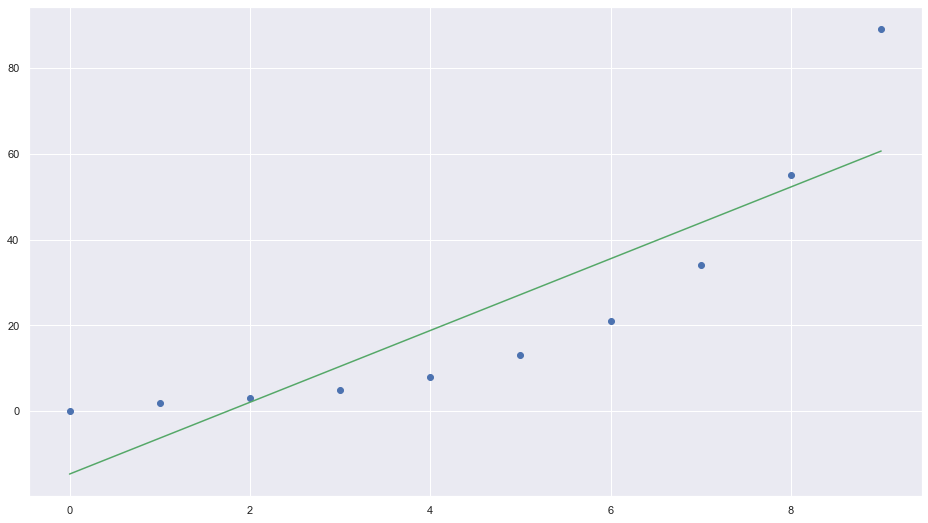

In [50]:
#importing
%matplotlib inline
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from scipy import stats

from matplotlib.pyplot import figure

plt.rcParams["figure.figsize"] = (16,9)

#creating data
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([0,2,3,5,8,13,21,34,55,89])

#creating OLS regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
def linefitline(b):
    return intercept + slope * b
line1 = linefitline(x)

#plot line
plt.scatter(x,y)
plt.plot(x,line1, c = 'g')
plt.show()

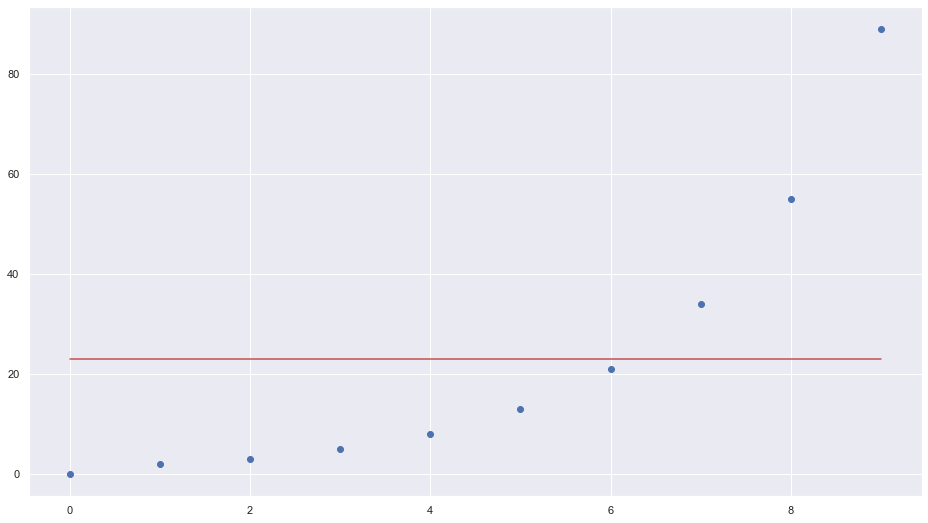

In [51]:
line2 = np.full(10,[y.mean()])
plt.scatter(x,y)
plt.plot(x,line2, c = 'r')
plt.show()

In [52]:
differences_line1 = linefitline(x)-y
line1sum = 0
for i in differences_line1:
    line1sum = line1sum + (i*i)
print("Squared differences for regression", line1sum)

Squared differences for regression 1753.0909090909095


In [53]:
differences_line2 = line2 - y
line2sum = 0
for i in differences_line2:
    line2sum = line2sum + (i*i)
print("Squared differences for mean", line2sum)

Squared differences for mean 7524.0


In [73]:
ESS = line2sum - line1sum
print("ESS", ESS)

ESS 5770.90909090909


In [74]:
RSS = line2sum
print("RSS", RSS)

RSS 7524.0


In [76]:
r2 = ESS/RSS
r2

0.7670001449905754

In [77]:
TSS = line1sum
RSS = line2sum
1- TSS/RSS

0.7670001449905756

In [78]:
r2 = r2_score(y, linefitline(x))
print('The rsquared value is: ' + str(r2))

The rsquared value is: 0.7670001449905756
